In [13]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Import Everything
import cv2
import matplotlib.pyplot as plt
import utils
import numpy as np
# Set image path
folder = f"./equations"

In [15]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [16]:
def boundingBoxes(fileName):
    # Read Input image
    inputImage = cv2.imread(fileName)
    # Deep copy for results
    inputImageCopy = inputImage.copy()
    # Convert BGR to grayscale
    grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
    # Threshold via Otsu
    threshValue, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # Get each bounding box
    # Find the big contours/blobs on the filtered image
    contours, hierarchy = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours,_ = sort_contours(contours)
    # contours, _ = sort_contours(contours, "top-to-bottom")


    # Expand the bounding box size
    expansion_value = 10  # Increase this value to expand the bounding boxes more
    bounding_boxes = []
    # Look for the outer bounding boxes (no children)
    for _, c in enumerate(contours):
        # Get the bounding rectangle of the current contour
        boundRect = cv2.boundingRect(c)
        
        # Expand bounding box
        rectX = max(0, boundRect[0] - expansion_value)
        rectY = max(0, boundRect[1] - expansion_value)
        rectWidth = min(inputImage.shape[1] - rectX, boundRect[2] + 2 * expansion_value)
        rectHeight = min(inputImage.shape[0] - rectY, boundRect[3] + 2 * expansion_value)
        
        # Draw expanded bounding box
        color = (0, 255, 0)
        start_X = int(rectX)
        end_X = int(start_X + rectWidth)
        start_Y = int(rectY)
        end_Y = int(start_Y + rectHeight)
        contoursImage = inputImageCopy.copy()
        bounding_boxes.append(contoursImage[start_Y:end_Y, start_X:end_X])
        cv2.rectangle(inputImageCopy, (start_X, start_Y),
                    (end_X, end_Y), color, 2)

    # Show the image with expanded bounding boxes
    bb_image = cv2.cvtColor(inputImageCopy, cv2.COLOR_BGR2RGB)
    plt.imshow(bb_image)
    return bounding_boxes

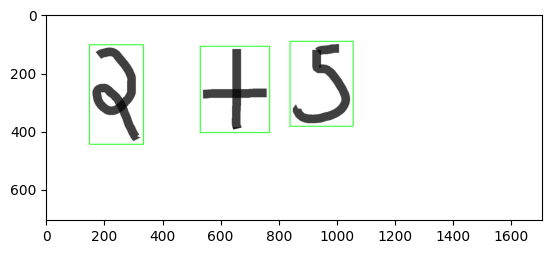

In [17]:
fileName = f"{folder}/eq_3.png"
bounding_boxes = boundingBoxes(fileName)

In [18]:
import utils

In [19]:
len(bounding_boxes)

3

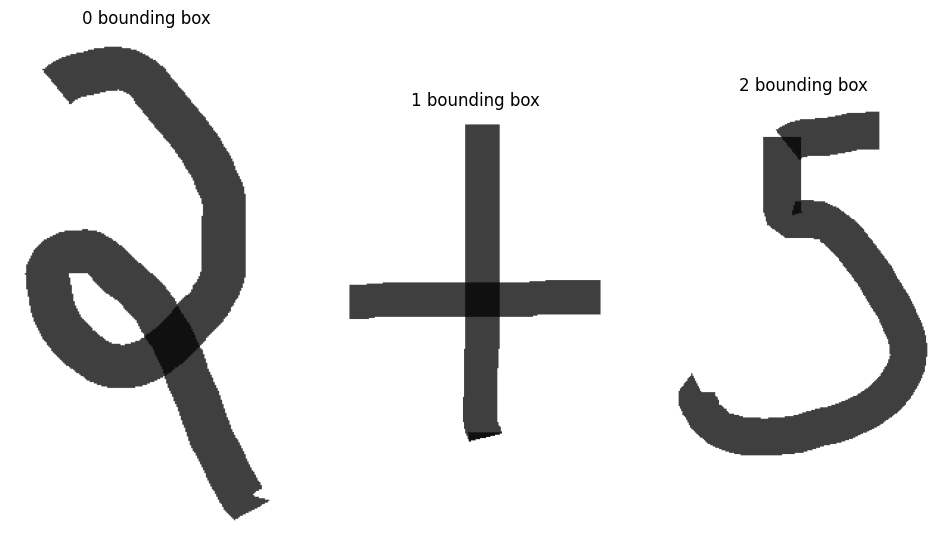

In [20]:
utils.displayBoundingBoxes(bounding_boxes, rows=1, cols=3)

In [10]:
from model import Sequential

In [21]:
labels = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, '-': 11, 'div': 12, 'rightarrow': 13, 'times': 14, 'u': 15, 'v': 16, 'w': 17, 'y': 18, 'z': 19}

In [22]:
def idtolabel(labels_map, y):
    for key, value in labels_map.items():
        if y == value:
            return key
        
    return -1

In [27]:
sequential_model = utils.load_model()

In [42]:
def predict(model:Sequential, img):
    img = np.expand_dims(img, (0,1))
    print(img.shape)
    logits = model._forward(img)
    y_pred = np.argmax(logits, axis=1)
    return y_pred
    

In [43]:

def get_symbols(model, bounding_boxes):
    equation_string = []
    for bb in bounding_boxes:
        preprocessed_img = utils.preprocess_image(bb)
        max_index = predict(model, preprocessed_img)
        predicted_class = idtolabel(labels, max_index)
        equation_string.append(predicted_class)

    return equation_string



In [44]:
symbols_list = get_symbols(sequential_model, bounding_boxes)

(1, 1, 65, 65)


ValueError: shapes (1,31752) and (22472,256) not aligned: 31752 (dim 1) != 22472 (dim 0)